In [1]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

In [2]:
lumapiFile =  "C:\\Program Files\\Lumerical\\v212\\api\\python\\lumapi.py"
lumapi   = imp.load_source("lumapi", lumapiFile)

In [3]:
# Arquivo de Simulação
modeFile = "1x2_MMI_Cband_TE0_1550_nm.lms"
fileDAT  = "1x2_MMI_Cband_TE0_1550_nm.dat"
mode  = lumapi.MODE(modeFile)

### Dispositivo: 1x2 MMI, SiN-SiO2, Banda C, TE0
### Resultados
##### 1. Perfil de Campo no Dispositivo
##### 2.1. Perfil nas Portas de Entrada
##### 2.2. Perfil nas Portas de Saída
##### 3. Transmitância
##### 4. Insertion Loss
##### 5. Defasagem
##### 6. Interferência multimodos

In [4]:
lambd_min = 1.500e-6
lambd_max = 1.700e-6
emepoints = 200
group_delay = 1

In [5]:
mode.setemeanalysis("wavelength sweep",1);
mode.setemeanalysis("start wavelength", lambd_min);
mode.setemeanalysis("stop wavelength", lambd_max);
mode.setemeanalysis("calculate group delays", group_delay);
mode.setemeanalysis("number of wavelength points", emepoints);
mode.emesweep("wavelength sweep");
mode.exportemesweep(fileDAT,"lumerical");
mode.emepropagate();

## 1. Perfil de Campo no Dispositivo

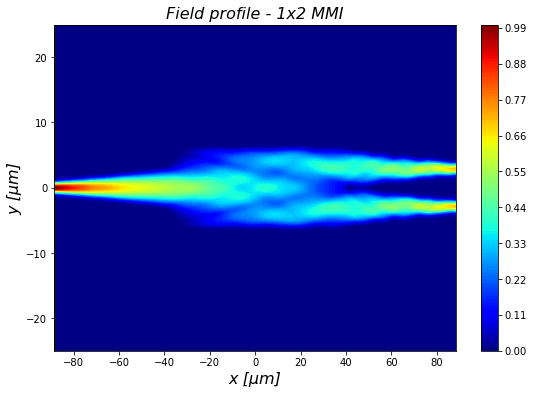

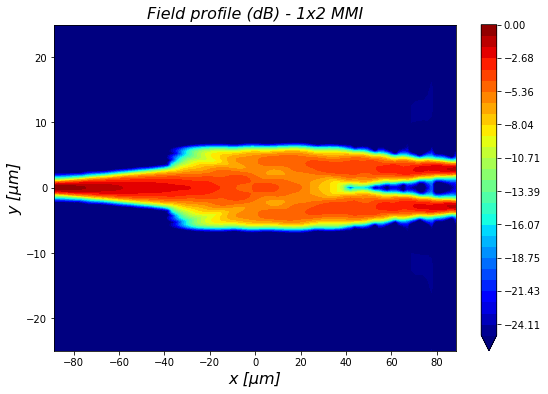

In [6]:
#%% Perfil de Campo

E = mode.getresult("profile","field profile");
niveis = np.linspace(-25, 0, num = 29);

lambd = E['lambda'];

x = E['x']
x = x[:,0]
y = E['y']
y = y[:,0]
z = E['z']

E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]
Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)
Emag = Emag/Emag.max();

plt.figure(figsize=(9,6))
mycmap = plt.get_cmap('jet')

plt.contourf(1e6*x,1e6*y,np.transpose(Emag[:,:,0]),100,cmap = mycmap)
plt.title('Field profile - 1x2 MMI',fontsize = 16,fontstyle = 'oblique')
plt.ylabel('y [μm]',fontsize = 16, fontstyle = 'oblique')
plt.xlabel('x [μm]',fontsize = 16, fontstyle = 'oblique')
plt.colorbar()
plt.show()

plt.figure(figsize=(9,6))
mycmap = plt.get_cmap('jet')

logE = 10*np.log10(np.transpose(Emag[:,:,0]))
mycmap = plt.get_cmap('jet')
plt.contourf(1e6*x,1e6*y,logE,100,cmap = mycmap, levels = niveis, extend = 'min')
plt.title('Field profile (dB) - 1x2 MMI',fontsize = 16,fontstyle = 'oblique')
plt.ylabel('y [μm]',fontsize = 16, fontstyle = 'oblique')
plt.xlabel('x [μm]',fontsize = 16, fontstyle = 'oblique')
plt.colorbar()
plt.show()

## 2.1. Perfil de Campo nas Portas de Entrada

<ipython-input-7-a05fe8277e5e>:24: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(1e6*y,1e6*z,10*np.log10(np.transpose(Emag[:,:,0])),100,cmap = mycmap, levels = niveis, extend = 'min')


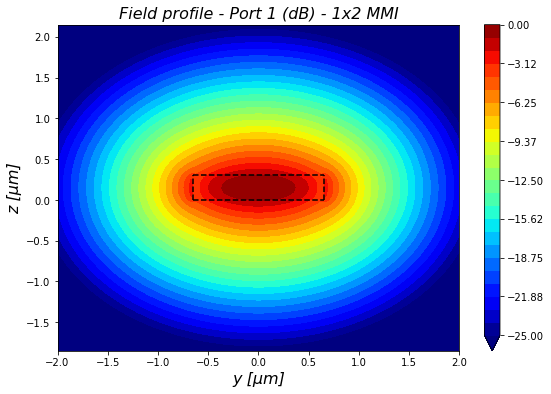

In [7]:
#%% Perfil de Campo nas Portas de Entrada
E_port = mode.getresult("EME::Ports::port_1", "mode profiles");
niveis = np.linspace(-25, 0, num = 25);

lambd = E_port['lambda'];

x = E_port['x']
y = E_port['y']
y = y[:,0]
z = E_port['z']
z = z[:,0]

E_port = E_port['E1']

Ex = E_port[0,:,:,:,0]
Ey = E_port[0,:,:,:,1]
Ez = E_port[0,:,:,:,2]
Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)
Emag = Emag/Emag.max();

plt.figure(figsize=(9,6))
mycmap = plt.get_cmap('jet')

plt.contourf(1e6*y,1e6*z,10*np.log10(np.transpose(Emag[:,:,0])),100,cmap = mycmap, levels = niveis, extend = 'min')
plt.vlines(x=-0.65,  ymin=0.0, ymax=0.3, color='black', ls='--');
plt.vlines(x=0.65,  ymin=0.0, ymax=0.3, color='black', ls='--');
plt.hlines(y=0.0,  xmin=-0.65, xmax=0.65, color='black', ls='--');
plt.hlines(y=0.3,  xmin=-0.65, xmax=0.65, color='black', ls='--');
plt.title('Field profile - Port 1 (dB) - 1x2 MMI',fontsize = 16,fontstyle = 'oblique')
plt.ylabel('z [μm]',fontsize = 16, fontstyle = 'oblique')
plt.xlabel('y [μm]',fontsize = 16, fontstyle = 'oblique')
cy = 0; plt.xlim(cy-2.00,cy+2.00);
cz = 0.15; plt.ylim(cz-2.00,cz+2.00);
plt.colorbar();
plt.show()

## 2.2. Perfil de Campo nas Portas de Saída

<ipython-input-8-e607a8e9282b>:23: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(1e6*y,1e6*z,10*np.log10(np.transpose(Emag[:,:,0])),100,cmap = mycmap, levels = niveis, extend = 'min')


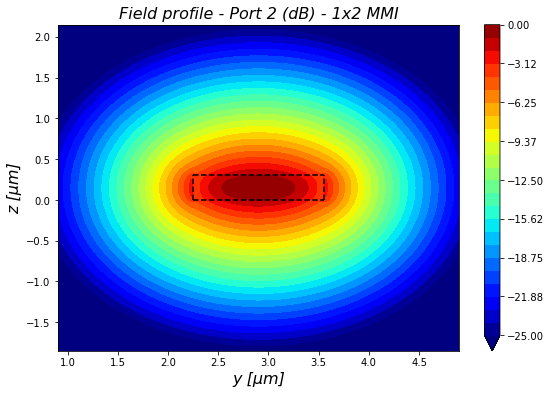

<ipython-input-8-e607a8e9282b>:57: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(1e6*y,1e6*z,10*np.log10(np.transpose(Emag[:,:,0])),100,cmap = mycmap, levels = niveis, extend = 'min')


In [8]:
#%% Perfil de Campo nas Portas de Saída
E_port = mode.getresult("EME::Ports::port_2", "mode profiles");

lambd = E_port['lambda'];

x = E_port['x']
y = E_port['y']
y = y[:,0]
z = E_port['z']
z = z[:,0]

E_port = E_port['E1']

Ex = E_port[0,:,:,:,0]
Ey = E_port[0,:,:,:,1]
Ez = E_port[0,:,:,:,2]
Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)
Emag = Emag/Emag.max();

plt.figure(figsize=(9,6))
mycmap = plt.get_cmap('jet')

plt.contourf(1e6*y,1e6*z,10*np.log10(np.transpose(Emag[:,:,0])),100,cmap = mycmap, levels = niveis, extend = 'min')
plt.vlines(x=2.25,  ymin=0.0, ymax=0.3, color='black', ls='--');
plt.vlines(x=3.55,  ymin=0.0, ymax=0.3, color='black', ls='--');
plt.hlines(y=0.0,  xmin=2.25, xmax=3.55, color='black', ls='--');
plt.hlines(y=0.3,  xmin=2.25, xmax=3.55, color='black', ls='--');
plt.title('Field profile - Port 2 (dB) - 1x2 MMI',fontsize = 16,fontstyle = 'oblique')
plt.ylabel('z [μm]',fontsize = 16, fontstyle = 'oblique')
plt.xlabel('y [μm]',fontsize = 16, fontstyle = 'oblique')
cy = 2.9; plt.xlim(cy-2.00,cy+2.00);
cz = 0.15; plt.ylim(cz-2.00,cz+2.00);
plt.colorbar()
plt.show()

E_port = mode.getresult("EME::Ports::port_3", "mode profiles");

lambd = E_port['lambda'];

x = E_port['x']
y = E_port['y']
y = y[:,0]
z = E_port['z']
z = z[:,0]

E_port = E_port['E1']

Ex = E_port[0,:,:,:,0]
Ey = E_port[0,:,:,:,1]
Ez = E_port[0,:,:,:,2]
Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)
Emag = Emag/Emag.max();

plt.figure(figsize=(9,6))
mycmap = plt.get_cmap('jet')

plt.contourf(1e6*y,1e6*z,10*np.log10(np.transpose(Emag[:,:,0])),100,cmap = mycmap, levels = niveis, extend = 'min')
plt.vlines(x=-2.25,  ymin=0.0, ymax=0.3, color='black', ls='--');
plt.vlines(x=-3.55,  ymin=0.0, ymax=0.3, color='black', ls='--');
plt.hlines(y=0.0,  xmin=-2.25, xmax=-3.55, color='black', ls='--');
plt.hlines(y=0.3,  xmin=-2.25, xmax=-3.55, color='black', ls='--');
plt.title('Field profile - Port 3 (dB) - 1x2 MMI',fontsize = 16,fontstyle = 'oblique')
plt.ylabel('z [μm]',fontsize = 16, fontstyle = 'oblique')
plt.xlabel('y [μm]',fontsize = 16, fontstyle = 'oblique')
cy = -2.9; plt.xlim(cy-2.00,cy+2.00);
cz = 0.15;  plt.ylim(cz-2.00,cz+2.00);
plt.colorbar()
plt.show()

## 3. Transmitância

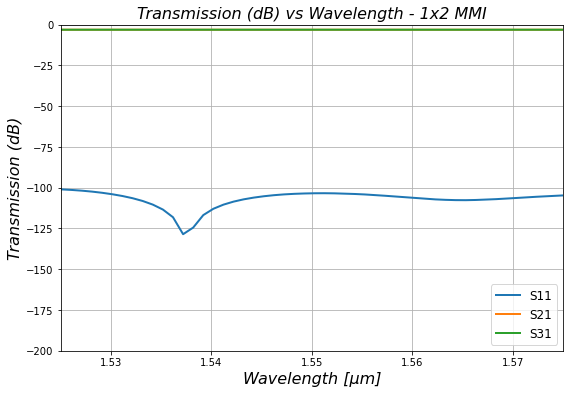

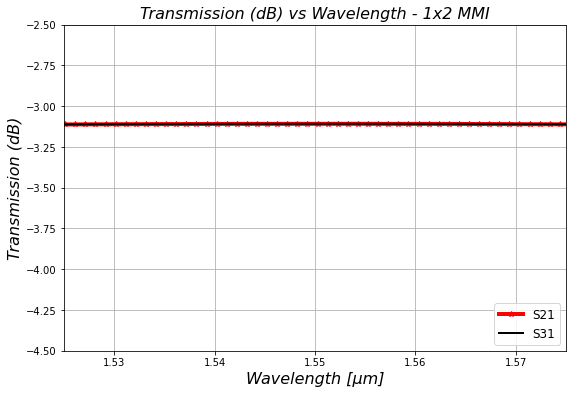

In [16]:
#%% Transmitância
S_matrix = mode.getemesweep("S_wavelength_sweep");
lambd = S_matrix['wavelength'];
S11   = np.abs(S_matrix['s11'])**2;
S21   = np.abs(S_matrix['s21'])**2;
S31   = np.abs(S_matrix['s31'])**2;

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, S11, linewidth=2,label = 'S11');
plt.plot(1e6*lambd, S21, linewidth=2,label = 'S21');
plt.plot(1e6*lambd, S31, linewidth=2,label = 'S31');
plt.title('Transmission vs Wavelength - 1x2 MMI', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Transmission', fontsize=16.0, fontstyle='oblique')
plt.xlim([1.525,1.575])
plt.ylim([-0.01, 0.55])
plt.legend(loc="lower right", fontsize=12.0);
plt.grid();
plt.show();

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, S21, 'r*-', linewidth=4,label = 'S21');
plt.plot(1e6*lambd, S31, 'k', linewidth=2,label = 'S31');
plt.title('Transmission vs Wavelength - 1x2 MMI', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Transmission', fontsize=16.0, fontstyle='oblique')
plt.xlim([1.525,1.575])
plt.ylim([0.35,0.55])
plt.legend(loc="lower right", fontsize=12.0);
plt.grid();
plt.show();

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, 10*np.log10(S11), linewidth=2,label = 'S11');
plt.plot(1e6*lambd, 10*np.log10(S21), linewidth=2,label = 'S21');
plt.plot(1e6*lambd, 10*np.log10(S31), linewidth=2,label = 'S31');
plt.title('Transmission (dB) vs Wavelength - 1x2 MMI', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Transmission (dB)', fontsize=16.0, fontstyle='oblique')
plt.xlim([1.525,1.575])
plt.ylim([-200,0])
plt.legend(loc="lower right", fontsize=12.0);
plt.grid();
plt.show();

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, 10*np.log10(S21), 'r*-', linewidth=4,label = 'S21');
plt.plot(1e6*lambd, 10*np.log10(S31), 'k',  linewidth=2,label = 'S31');
plt.title('Transmission (dB) vs Wavelength - 1x2 MMI', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Transmission (dB)', fontsize=16.0, fontstyle='oblique')
plt.xlim([1.525,1.575])
plt.ylim([-4.5,-2.5])
plt.legend(loc="lower right", fontsize=12.0);
plt.grid();
plt.show();

## 4. Insertion Loss

In [14]:
# Insertion Loss

IL   = (S21+S31);                       # Insertion Loss
ILdB   = 10*np.log10(S21+S31);          # Insertion Loss (dB)
peak = np.where(IL == IL.max());        # Pico de Transmissão (Valor em dB)
lambd_peak = lambd[ np.max(peak)];      # Pico de Transmissão (Comprimento de onda)

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, IL, linewidth=2,label = 'S21+S31');
plt.axvline(x=(1e6*lambd_peak), color='purple', ls='--');
plt.title('Insertion Loss vs Wavelength - 1x2 MMI - Peak: %0.2f nm' % (1e9*lambd_peak), fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Insertion loss', fontsize=16.0, fontstyle='oblique')
plt.xlim([1.525,1.575])
plt.ylim([10**(-0.5/10),1])
plt.legend(loc="lower right", fontsize=12.0);
plt.grid();
plt.show();

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, ILdB , linewidth=2,label = 'S21+S31');
plt.axvline(x=(1e6*lambd_peak), color='purple', ls='--');
plt.title('Insertion Loss (dB) vs Wavelength - 1x2 MMI - Peak: %0.2f nm' % (1e9*lambd_peak), fontsize=16.0, fontstyle='oblique')
plt.xlabel('wavelength [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Insertion loss (dB)', fontsize=16.0, fontstyle='oblique')
plt.xlim([1.525,1.575])
plt.ylim([-0.5,0])
plt.legend(loc="lower right", fontsize=12.0);
plt.grid();
plt.show();

print(IL.max())
print(10*np.log10(IL.max()))
print(lambd_peak)

0.9777577757786748
-0.0976872156417947
[1.55226131e-06]


## 5. Phase difference

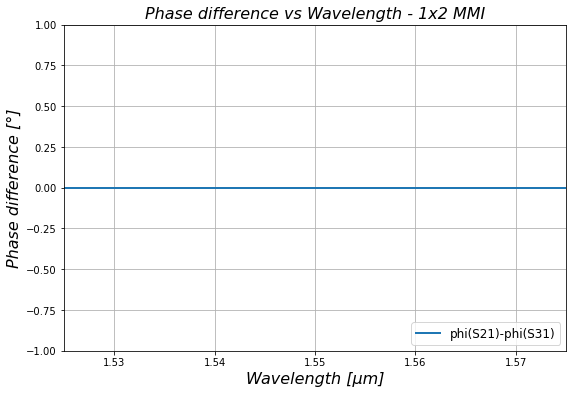

In [11]:
# Defasagem
phi1 = np.angle(S_matrix['s21'])  
phi2 = np.angle(S_matrix['s31'])
            
S21_phs_n1 = np.unwrap(phi1)*(180/np.pi);
S21_phs_n2 = np.unwrap(phi2)*(180/np.pi);

phase = (S21_phs_n1-S21_phs_n2)

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, phase, linewidth=2, label = 'phi(S21)-phi(S31)');
plt.title('Phase difference vs Wavelength - 1x2 MMI', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Phase difference [°]', fontsize=16.0, fontstyle='oblique')
plt.xlim([1.525,1.575])
plt.ylim([-1, 1])
plt.legend(loc="lower right", fontsize=12.0);
plt.grid();
plt.show();

## 5. Interferência multimodos

In [17]:
# Arquivo de Simulação
modeFile = "1x2_MMI_Cband_TM0_1550_nm.lms"
fileDAT  = "1x2_MMI_Cband_TM0_1550_nm.dat"
mode.close();
mode  = lumapi.MODE(modeFile)

mode.setemeanalysis("wavelength sweep",1);
mode.setemeanalysis("start wavelength", lambd_min);
mode.setemeanalysis("stop wavelength", lambd_max);
mode.setemeanalysis("calculate group delays", group_delay);
mode.setemeanalysis("number of wavelength points", emepoints);
mode.emesweep("wavelength sweep");
mode.emepropagate();

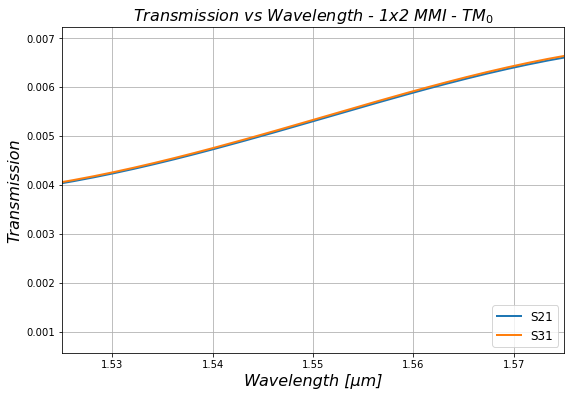

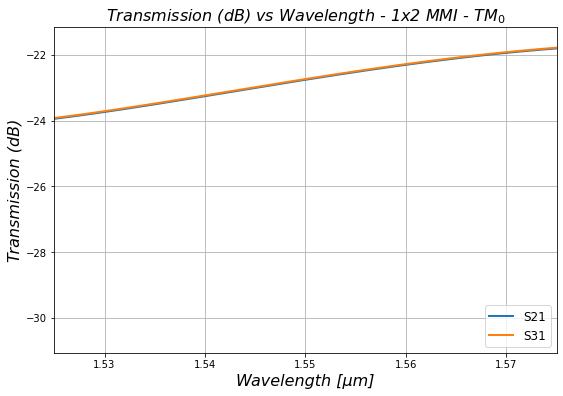

In [19]:
#%% Transmitância
S_matrix = mode.getemesweep("S_wavelength_sweep");
lambd = S_matrix['wavelength'];
S11   = np.abs(S_matrix['s11'])**2;
S21   = np.abs(S_matrix['s21'])**2;
S31   = np.abs(S_matrix['s31'])**2;

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, S21, linewidth=2,label = 'S21');
plt.plot(1e6*lambd, S31, linewidth=2,label = 'S31');
plt.title('Transmission vs Wavelength - 1x2 MMI - TM$_{0}$', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Transmission', fontsize=16.0, fontstyle='oblique')
plt.xlim([1.525,1.575])
plt.legend(loc="lower right", fontsize=12.0);
plt.grid();
plt.show();

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, 10*np.log10(S21), linewidth=2,label = 'S21');
plt.plot(1e6*lambd, 10*np.log10(S31), linewidth=2,label = 'S31');
plt.title('Transmission (dB) vs Wavelength - 1x2 MMI - TM$_{0}$', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Transmission (dB)', fontsize=16.0, fontstyle='oblique')
plt.xlim([1.525,1.575])
plt.legend(loc="lower right", fontsize=12.0);
plt.grid();
plt.show();